---
# Reddit Analysis
    First glance at the data: clean posts, stat word frequency and word2vec
---

In [1]:
# Import packages

import pandas as pd
import numpy as np
import itertools

import re

import shifterator 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

from collections import Counter
from itertools import chain
from shifterator import shifts as rs

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt')  # Download the tokenizer models
nltk.download('stopwords')  # Download the stopwords corpus

from string import punctuation

from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt # plotting

import time
from datetime import datetime

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trinidadbosch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trinidadbosch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def clean_text(items):
    
    start_time = time.time()
    
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['nan', 'like', 'would', 'one', 'also','-',
                            'im','people','-','ive','4','2','lot','1']) ## those were found after few cleaning iterations
    
    # Custom replacements for certain words
    custom_replacements = {'deep learning': 'deep-learning',
                           'artificial intelligence': 'artificial-intelligence',
                           'reinforcement learning':'reinforcement-learning',
                          'supervised learning': "supervised-learning",
                          "unsupervised learning": "unsupervised-learning",
                          "generative model": "generative-model",
                          "neural network": "neural-network",
                          "natural language processing":"natural-language-processing"}

    preprocessed_items = [] #list to store clean reddits
    
    for item in items:
        
        item = item.replace("\\n", " ")
        
        #remove https links
        item = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", item)
        #remove https links with no brackets
        item = re.sub('http://\S+|https://\S+', " ", item)
        #remove link markups []
        
        #note that this will also remove comment fields with ["Delete"] 
        item = re.sub(r"[\(\[].*?[\)\]]", " ", item)
        
        #remove \ in don\'t
        item = re.sub("[\"\']", "'", item)
        
        item = re.sub('&amp;#x200B;', " ", item)
        
        item = item.lower()  # Lowercase text
        item = re.sub(f"[{re.escape('’“”')}]", "", item)
        
        item = re.sub(f"[{re.escape(punctuation)}]", "", item)  # Remove punctuation
        
        # Apply custom replacements
        for key, value in custom_replacements.items():
            item = item.replace(key, value)
        
        tokens = word_tokenize(item)
        
        # Remove stopwords
        #tokens = [word for word in tokens if word.lower() not in stop_words]
       
        # Remove stopwords and custom stopwords
        tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() not in custom_stopwords]
        
        if tokens:
            preprocessed_items.append(tokens)
        else:
            preprocessed_items.append('')
    end_time = time.time()  # Record the end time
    elapsed_time = (end_time - start_time)
    elapsed_minutes = elapsed_time/60 # Calculate the elapsed time
    print(f"Time taken to preprocess items: {elapsed_time:.2f} seconds, which equals to {elapsed_minutes} minutes ")
            
    return preprocessed_items

In [3]:
reddit = pd.read_csv("/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Reddit/Data/query_david.csv")

In [5]:
len(reddit)

475730

In [30]:
reddit.columns

Index(['dataset', 'created_utc', 'retrieved_utc', 'num_comments', 'score',
       'upvote_ratio', 'num_crossposts', 'gilded', 'subreddit_subscribers',
       'stickied', 'locked', 'quarantine', 'over_18', 'id', 'author',
       'author_flair_text', 'link_flair_text', 'subreddit', 'domain', 'title',
       'selftext'],
      dtype='object')

In [4]:
## transform timestamp to date time and drop columns
reddit['date_created'] = pd.to_datetime(reddit['created_utc'], unit='s')
reddit['date_retrieved'] = pd.to_datetime(reddit['retrieved_utc'], unit='s')
columns_to_drop = ['created_utc', 'retrieved_utc','dataset','num_comments', 'score',
                'upvote_ratio', 'num_crossposts','gilded',
                'subreddit_subscribers', 'stickied', 'locked',
                'quarantine','over_18','author_flair_text']
reddit = reddit.drop(columns=columns_to_drop)

In [20]:
#reddit.head()

In [5]:
reddit['title'] = reddit['title'].astype(str)
reddit['selftext'] = reddit['selftext'].astype(str)
reddit['author'] = reddit['author'].astype(str)

In [8]:
reddit.selftext[5]

'**Hollywall Entertainment Inc., (OTC:HWAL) Announces the Completion of its 2021 and 2020 Audit (s)**Press Release | 03/24/2023\\n\\n**WASHINGTON DC / ACCESSWIRE / March 24, 2023 /** [Hollywall Entertainment Inc. (OTC Pink:HWAL)](https://pr.report/9Dieh7oF), a multi-faceted developer, telecommunications, technology, media, sports and entertainment and broadcasting company, announces the successful completion of its Public Company Accounting Oversight Board United States (PCAOB) audited financial statements for fiscal years ending in December 31, 2021 and 2020. Furthermore, Hollywall has recently made its application to qualify for an uplisting to the OTC Markets Group\'s OTCQB Venture Market in the United States.\\n\\nPreviously, in June 2022, the company announced the completion of the (PCAOB) audited financial statements for fiscal year(s) ending in December 31, 2019 and December 31, 2020.\\n\\nEarlier this week, HWAL announced it had formed a new technology division and intends to i

### Preprocess all Reddit
    It will take too long to run over the whole dataset

In [6]:
## apply cleaning function
reddit['selftext_clean'] = clean_text(reddit['selftext'])
reddit['title_clean'] = clean_text(reddit['title'])

Time taken to preprocess items: 348.21 seconds, which equals to 5.803484388192495 minutes 
Time taken to preprocess items: 74.80 seconds, which equals to 1.246718696753184 minutes 


In [35]:
reddit.selftext_clean[5]

['hollywall',
 'entertainment',
 'inc',
 'announces',
 'completion',
 '2021',
 '2020',
 'audit',
 'press',
 'release',
 '03242023',
 'washington',
 'dc',
 'accesswire',
 'march',
 '24',
 '2023',
 'audited',
 'financial',
 'statements',
 'fiscal',
 'years',
 'ending',
 'december',
 '31',
 '2021',
 '2020',
 'furthermore',
 'hollywall',
 'recently',
 'made',
 'application',
 'qualify',
 'uplisting',
 'otc',
 'markets',
 'groups',
 'otcqb',
 'venture',
 'market',
 'united',
 'states',
 'previously',
 'june',
 '2022',
 'company',
 'announced',
 'completion',
 'audited',
 'financial',
 'statements',
 'fiscal',
 'year',
 'ending',
 'december',
 '31',
 '2019',
 'december',
 '31',
 '2020',
 'earlier',
 'week',
 'hwal',
 'announced',
 'formed',
 'new',
 'technology',
 'division',
 'intends',
 'invest',
 'acquire',
 'operating',
 'companies',
 'ai',
 'data',
 'center',
 'blockchain',
 'nft',
 'crypto',
 'fintech',
 'industries',
 'new',
 'technology',
 'division',
 'hwal',
 'intends',
 'complete'

In [7]:
# Filter out rows with 'NaN' in 'selftext' column
filtered_df = reddit[reddit['selftext_clean'] != '']

# Flatten the lists in 'selftext' column
reddit_words = [word for words in filtered_df['selftext_clean'] for word in words]

# Count the frequency of each word
word_freq = Counter(reddit_words)

#print(sample_word_freq)

In [8]:
# # Filter out rows with 'NaN' in 'selftext' column
filtered_df = reddit[reddit['title_clean'] != '']

# Flatten the lists in 'selftext' column
reddit_words_title = [word for words in filtered_df['title_clean'] for word in words]

# Count the frequency of each word
word_freq_title = Counter(reddit_words_title)

#print(sample_word_freq)

In [10]:
## save as json to reuse as dictionary in wordshift graph
import json

import os

# Assuming you have Counter instances: word_freq_title and word_freq

# Convert Counters to dictionaries
dict_word_freq_title = dict(word_freq_title)
dict_word_freq = dict(word_freq)

# Specify the full file paths
directory_path = 'Desktop/SEDS/Tesis/Data/MA-Thesis/Reddit/Data'
file_path_word_freq_title = os.path.join(directory_path, 'word_freq_title.json')
file_path_word_freq = os.path.join(directory_path, 'word_freq.json')

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Save the dictionaries to JSON files
with open(file_path_word_freq_title, 'w') as json_file_title:
    json.dump(dict_word_freq_title, json_file_title)

with open(file_path_word_freq, 'w') as json_file:
    json.dump(dict_word_freq, json_file)

print(f"The word frequencies have been saved as JSON files: {file_path_word_freq_title} and {file_path_word_freq}")


The word frequencies have been saved as JSON files: Desktop/SEDS/Tesis/Data/MA-Thesis/Reddit/Data/word_freq_title.json and Desktop/SEDS/Tesis/Data/MA-Thesis/Reddit/Data/word_freq.json


## Plots

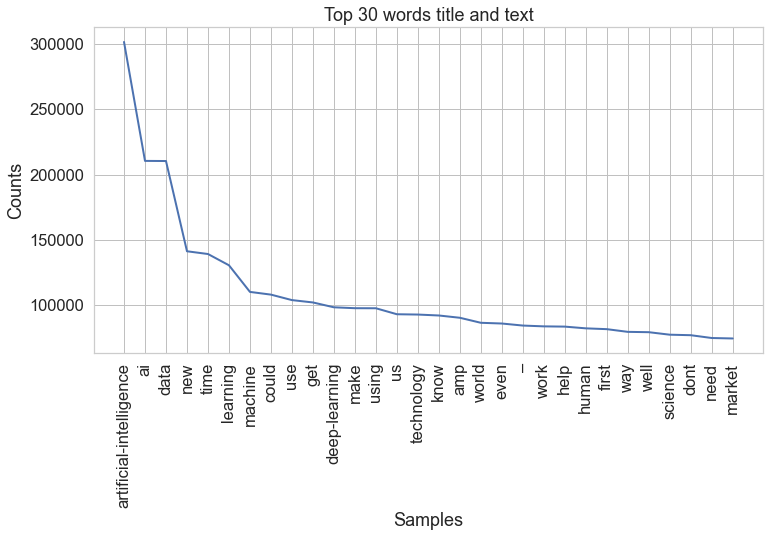

<Figure size 432x288 with 0 Axes>

In [11]:
from nltk.probability import FreqDist
# Combine title and abstract tokens into one list
all_tokens = reddit_words + reddit_words_title

# Create a frequency distribution of words
freq_dist = FreqDist(all_tokens)

plt.figure(figsize=(12, 6))
plt.title('Top 30 words title and text')
# Plot the word frequency distribution

freq_dist.plot(30, cumulative=False) #displaying 30 words
plt.tight_layout()
#plt.savefig('top-30-words-total.png')  # Save the figure as 'word_freq_distribution.png'

plt.show()

In [12]:
# Dataframes for most frequent common words in positive and negative 
common_title = pd.DataFrame(word_freq_title.most_common(100),
                             columns=['words', 'count'])
common_selftext = pd.DataFrame(word_freq.most_common(100),
                             columns=['words', 'count'])

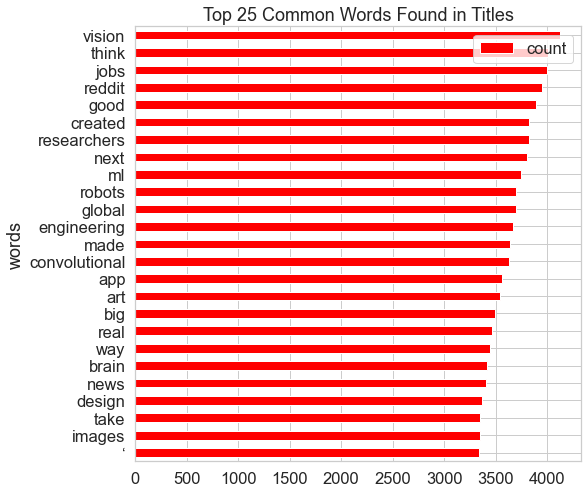

In [13]:
# Assuming you have already created common_title DataFrame

# Sort the DataFrame by the 'count' column in descending order
common_title_sorted = common_title.sort_values(by='count', ascending=True)

# Select the top 25 rows
top_25_common_title = common_title_sorted.head(25)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
top_25_common_title.plot.barh(x='words',
                               y='count',
                               ax=ax,
                               color="red")

ax.set_title("Top 25 Common Words Found in Titles")

plt.show()

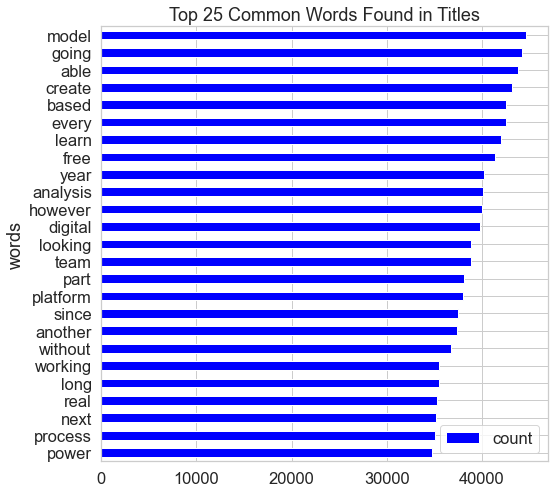

In [14]:
# Assuming you have already created common_title DataFrame
# Sort the DataFrame by the 'count' column in descending order
common_text_sorted = common_selftext.sort_values(by='count', ascending=True)

# Select the top 25 rows
top_25_common_text = common_text_sorted.head(25)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
top_25_common_text.plot.barh(x='words',
                               y='count',
                               ax=ax,
                               color="blue")

ax.set_title("Top 25 Common Words Found in Titles")

plt.show()

### Wordclouds - Reddit

In [20]:
texts_title = reddit['title_clean'].tolist()
texts_selftext = reddit['selftext_clean'].tolist()

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Title wordcloud
wordcloud_title = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    ).generate(str(texts_title))

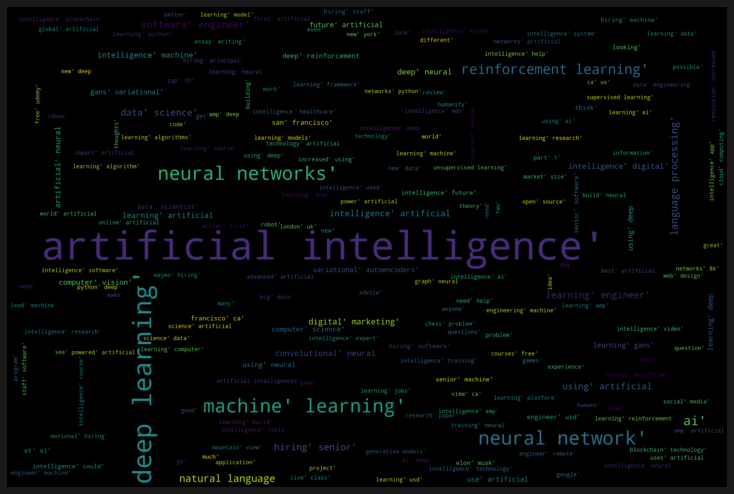

In [22]:
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_title, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
## Selftext wordcloud
wordcloud_selftext = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    ).generate(str(texts_selftext))

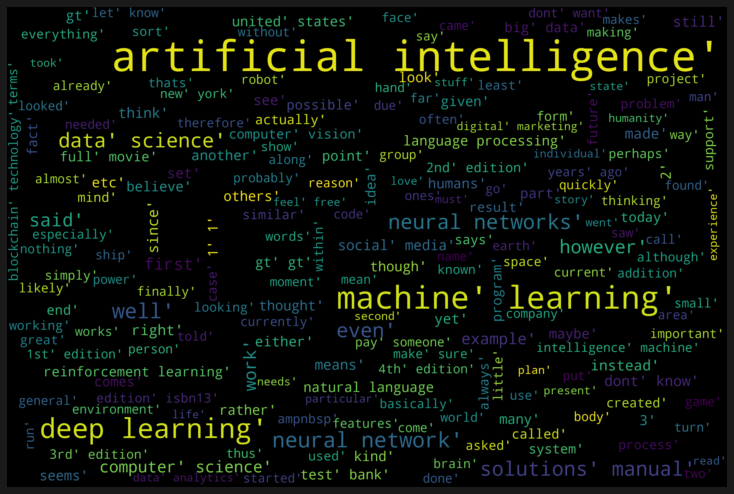

In [24]:
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_selftext, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Dates analysis

In [19]:
# Extract year-month
reddit['year_month'] = reddit['date_created'].dt.to_period('M')

# Filter data for years from 2013 onwards
filtered_reddit = reddit[reddit['date_created'].dt.year >= 2013]

# Group by year-month and get the distribution
date_distribution = filtered_reddit['year_month'].value_counts().sort_index()

# Display the distribution
print("Publish Date Distribution by Year-Month:")
print(date_distribution)

Publish Date Distribution by Year-Month:
year_month
2013-01      181
2013-02      167
2013-03      157
2013-04      175
2013-05      207
           ...  
2022-11     6023
2022-12    11069
2023-01    12517
2023-02    12594
2023-03    14934
Freq: M, Name: count, Length: 123, dtype: int64


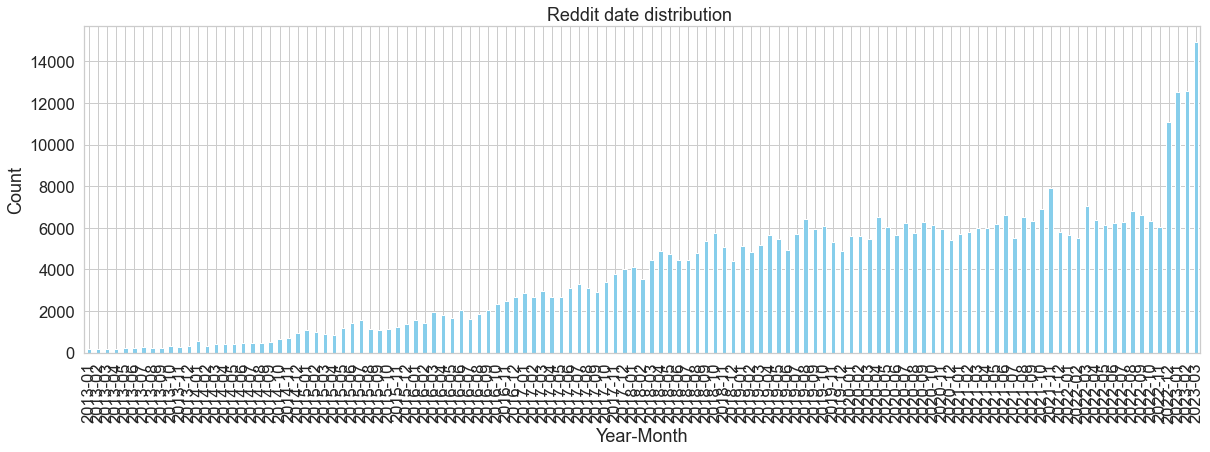

In [20]:
# Plotting the bar chart for the next 5 years
plt.figure(figsize=(20, 6))
date_distribution.plot(kind='bar', color='skyblue')
plt.title('Reddit date distribution ')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Set the same y-axis range for both plots
#plt.ylim(0, max(first_5_years_counts.max(), next_5_years_counts.max()) + 1)

plt.show()

In [22]:
# Filter for the first 5 years
first_5_years_df = filtered_reddit[filtered_reddit['year_month'].dt.year <= filtered_reddit['year_month'].dt.year.min() + 4]

# Filter for the next 5 years
next_5_years_df = filtered_reddit[filtered_reddit['year_month'].dt.year > filtered_reddit['year_month'].dt.year.min() + 4]

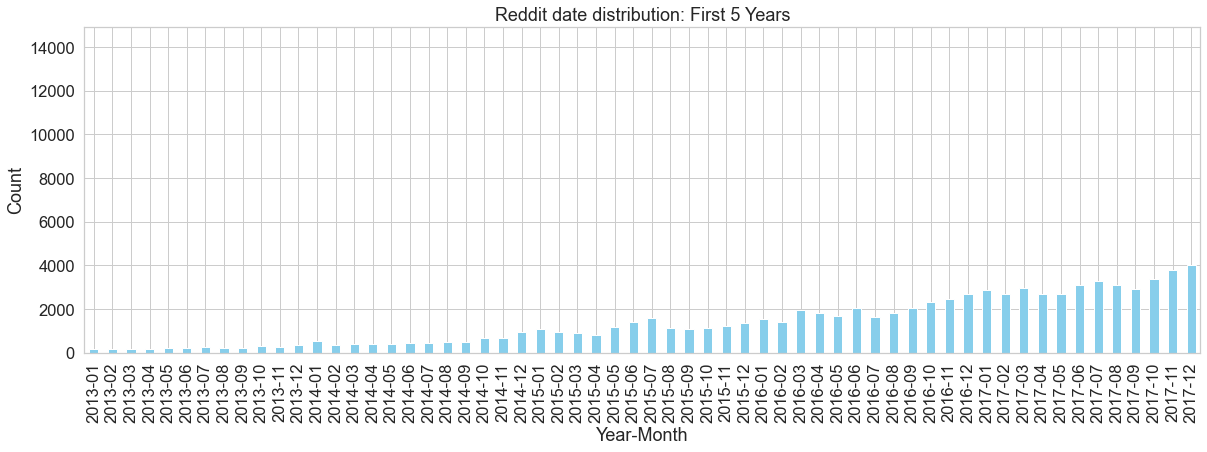

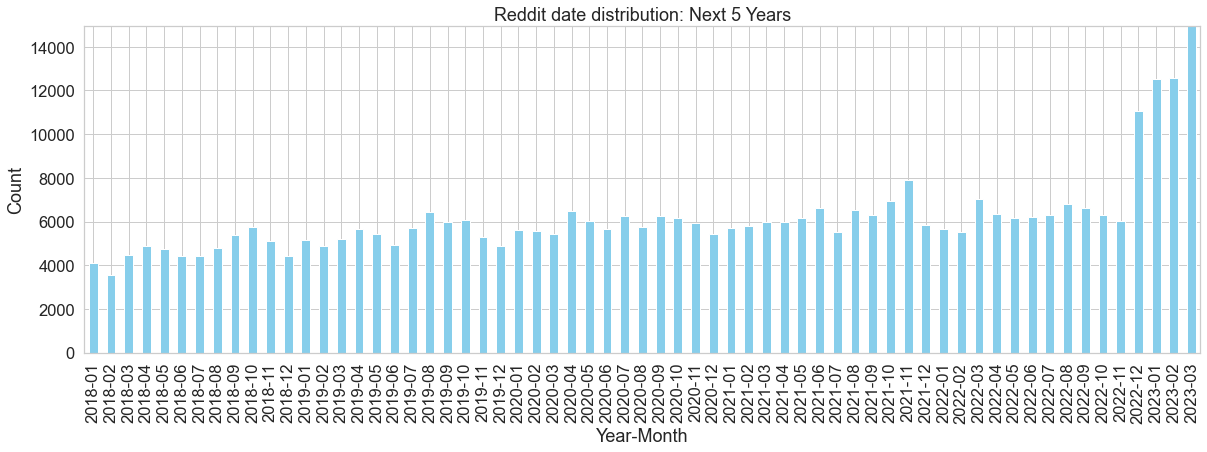

In [23]:
# Plotting the bar chart for the first 5 years
plt.figure(figsize=(20, 6))
first_5_years_counts = first_5_years_df['year_month'].value_counts().sort_index()
first_5_years_counts.plot(kind='bar', color='skyblue')
plt.title('Reddit date distribution: First 5 Years')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Set the same y-axis range for both plots
plt.ylim(0, max(first_5_years_counts.max(), next_5_years_df['year_month'].value_counts().max()) + 1)

plt.show()

# Plotting the bar chart for the next 5 years
plt.figure(figsize=(20, 6))
next_5_years_counts = next_5_years_df['year_month'].value_counts().sort_index()
next_5_years_counts.plot(kind='bar', color='skyblue')
plt.title('Reddit date distribution: Next 5 Years')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Set the same y-axis range for both plots
plt.ylim(0, max(first_5_years_counts.max(), next_5_years_counts.max()) + 1)

plt.show()

---
# Part 2: word2vec
---

In [63]:
from gensim.models import Word2Vec
#filtered_sample_df

In [59]:
reddit['selftext'] = reddit['selftext'].fillna('')
reddit['title'] = reddit['title'].fillna('')

reddit['allText'] = reddit['title'].str.cat(reddit['selftext'], sep=' ')

In [60]:
# Filter data for dates starting from 2013
reddit_filtered = reddit[reddit['date_created'].dt.year >= 2013]

In [61]:
reddit_filtered['allText'] = clean_text(reddit_filtered['allText'])

Time taken to preprocess items: 724.12 seconds, which equals to 12.068623002370199 minutes 


<ipython-input-61-c0cdc89a8ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_filtered['allText'] = clean_text(reddit_filtered['allText'])


In [64]:
# # preparing input
sentences = reddit_filtered['allText'].tolist()

start_time = time.time()

# # Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, hs=0, negative=5, workers=4, epochs=10)

# # Save the model for later use
model.save("word2vec_reddit_final.model")

end_time = time.time()

In [67]:
total_time = end_time - start_time
print(f'Total training embeddings and saving model time {total_time/60} minutes')

Total training embeddings and saving model time 15.319124881426493 minutes


In [29]:
## Model read
model = Word2Vec.load("word2vec_reddit_28nov.model")

In [208]:
vocabulary = model.wv.key_to_index

# Check the vocabulary
print(list(vocabulary.keys()))

['artificial-intelligence', 'data', 'ai', 'learning', 'new', 'time', 'neural', 'use', 'machine', 'could', 'get', 'make', 'deep-learning', 'using', 'network', 'technology', 'us', 'first', 'work', 'world', 'even', 'know', 'help', '1', 'gt', 'dont', 'well', 'human', 'market', 'need', 'way', 'science', 'think', 'amp', 'want', 'many', 'best', 'information', 'years', 'system', 'research', 'take', 'good', '2', '–', 'may', '3', 'see', 'used', 'computer', 'much', 'networks', 'online', 'business', 'development', 'future', 'game', 'free', 'model', 'software', 'better', 'really', 'two', 'project', 'course', 'something', 'different', 'things', 'still', 'said', 'experience', 'life', 'digital', 'create', 'analysis', 'around', 'back', 'based', 'blockchain', 'made', 'python', 'company', 'training', 'go', 'every', 'solutions', 'right', 'systems', 'able', 'r', 'learn', 'find', 'going', 'full', 'year', 'team', 'however', 'platform', 'without', 'ive', 'google', 'next', 'lot', 'working', 'another', 'humans'

In [68]:
## trying others
model.wv.most_similar("bot", topn=25)

[('bots', 0.8240777850151062),
 ('chatbot', 0.7053160667419434),
 ('chat', 0.6291944980621338),
 ('replika', 0.6090617179870605),
 ('app', 0.5992100238800049),
 ('npc', 0.5433977842330933),
 ('robot', 0.5412817597389221),
 ('xyzzy', 0.5387496948242188),
 ('tool', 0.5291048884391785),
 ('scripted', 0.5271275043487549),
 ('script', 0.5262422561645508),
 ('user', 0.5249440670013428),
 ('automatically', 0.5176953077316284),
 ('bottraders', 0.5160704255104065),
 ('telegrad', 0.5143342018127441),
 ('serenetea', 0.5141648650169373),
 ('algorithm', 0.5115724205970764),
 ('api', 0.5112641453742981),
 ('rsubredditsimulator', 0.5081648230552673),
 ('botartificial-intelligence', 0.5032504200935364),
 ('chatgpt', 0.503169596195221),
 ('gpt', 0.5014344453811646),
 ('rastreiobotbot', 0.5012950897216797),
 ('umrmo1', 0.5001064538955688),
 ('annamagdalena', 0.49745282530784607)]

In [69]:
## model all
queries = [
    "neural-network",
    "deep-learning",
    "reinforcement-learning",
    "supervised-learning",
    "unsupervised-learning",
    "generative-model",
    "natural-language-processing",
    "artificial-intelligence"
]

# # Find nearest neighbors for each query
for query in queries:
    similar_words = model.wv.most_similar(query, topn=25)
    print(f"Nearest neighbors for '{query}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
    print()

Nearest neighbors for 'neural-network':
neural-networks: 0.8704
nn: 0.7932
rnn: 0.6999
algorithm: 0.6830
nns: 0.6684
model: 0.6669
cnn: 0.6618
classifier: 0.6484
neural-network—a: 0.6412
dnn: 0.6237
generative-model: 0.6170
convolutconvnetcnn: 0.6119
convnet: 0.6056
kerasi: 0.6002
anns: 0.5997
gan: 0.5996
neural-networking: 0.5945
perceptron: 0.5864
lstm: 0.5831
mlp: 0.5812
dataset: 0.5741
deep-learning: 0.5719
sigla: 0.5709
neural-networks……solved: 0.5661
binary: 0.5649

Nearest neighbors for 'deep-learning':
ml: 0.7999
dl: 0.7759
nlp: 0.7201
natural-language-processing: 0.6950
mldl: 0.6717
neural-networks: 0.6591
reinforcement-learning: 0.6402
tensorflow: 0.6364
machinedeep-learning: 0.6260
pytorch: 0.6259
learning: 0.6049
rl: 0.5827
unsupervised-learning: 0.5805
ai: 0.5757
deeplearning: 0.5732
neural-network: 0.5719
mlai: 0.5631
supervised-learning: 0.5599
cnns: 0.5466
gbdts: 0.5405
classification: 0.5331
learn: 0.5322
performancescientific: 0.5284
artificial-intelligence: 0.5275
co

In [70]:
## use this article for topic modeling later
# https://towardsdatascience.com/lda2vec-word-embeddings-in-topic-models-4ee3fc4b2843